In [37]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [38]:
data = pd.read_csv("diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
data.shape

(768, 9)

In [42]:
v = data['Outcome'].value_counts().values
v

array([500, 268], dtype=int64)

In [43]:
# Let's create a Pie-Chart to graphically represent the class distribution

import plotly.graph_objects as go

labels = ['No', 'Yes']

fig = go.Figure(data=[go.Pie(labels=labels, values=v, pull=[0, 0.05])])
fig.show()

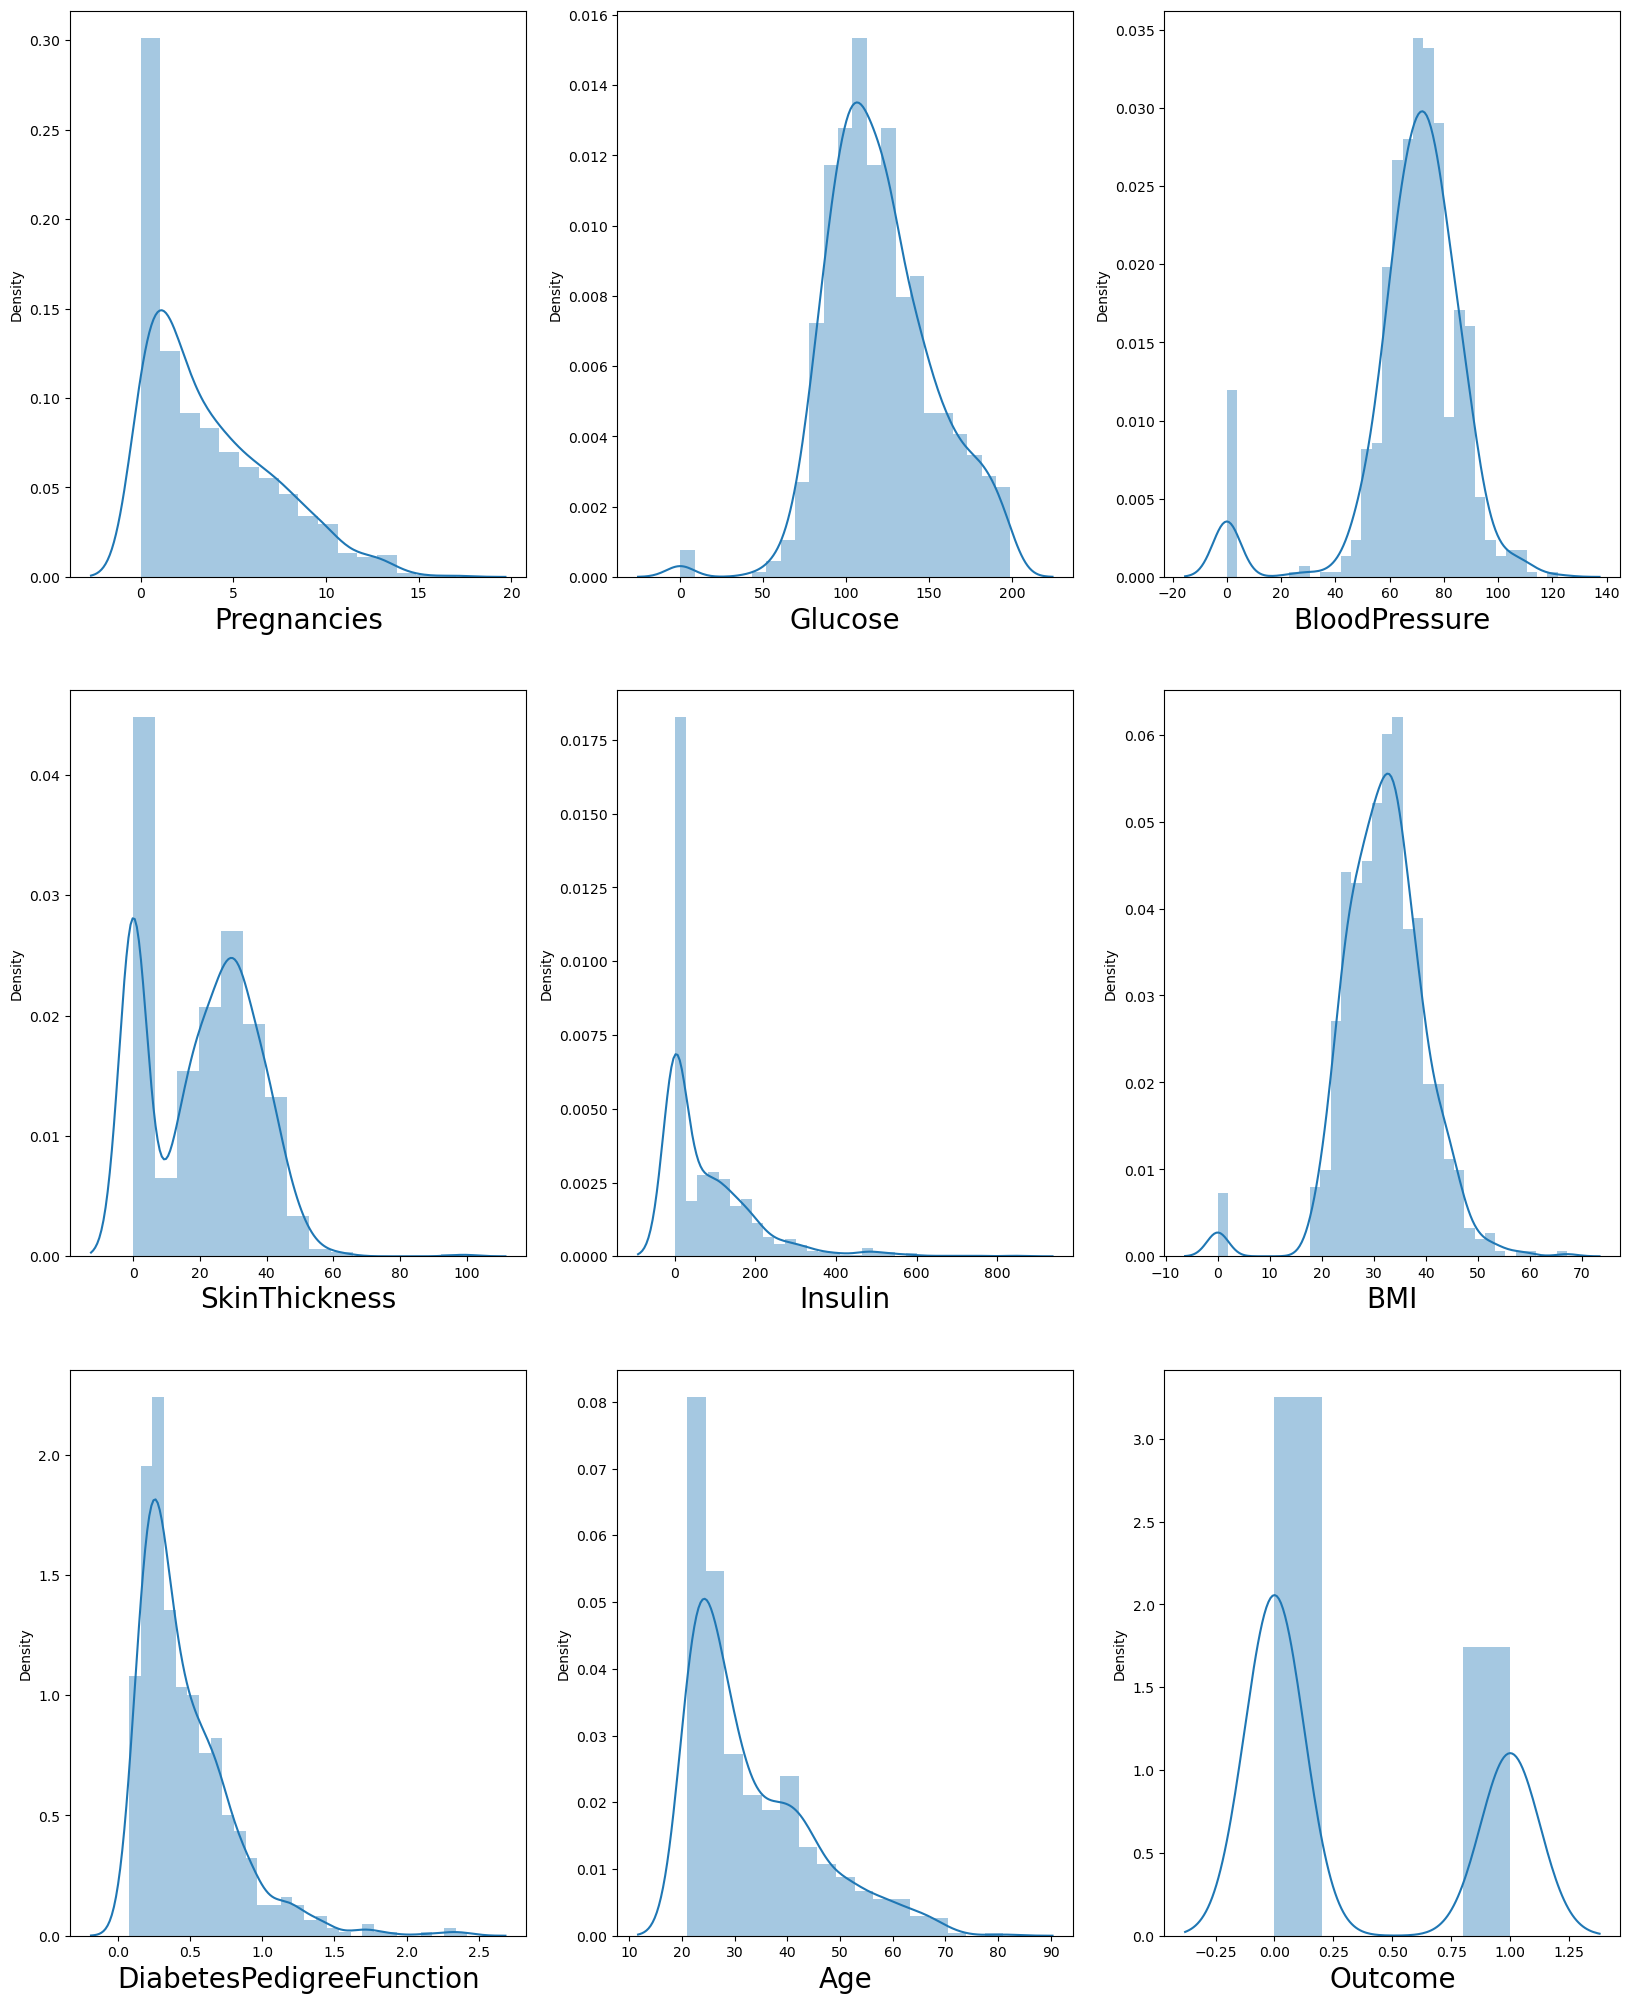

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [45]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

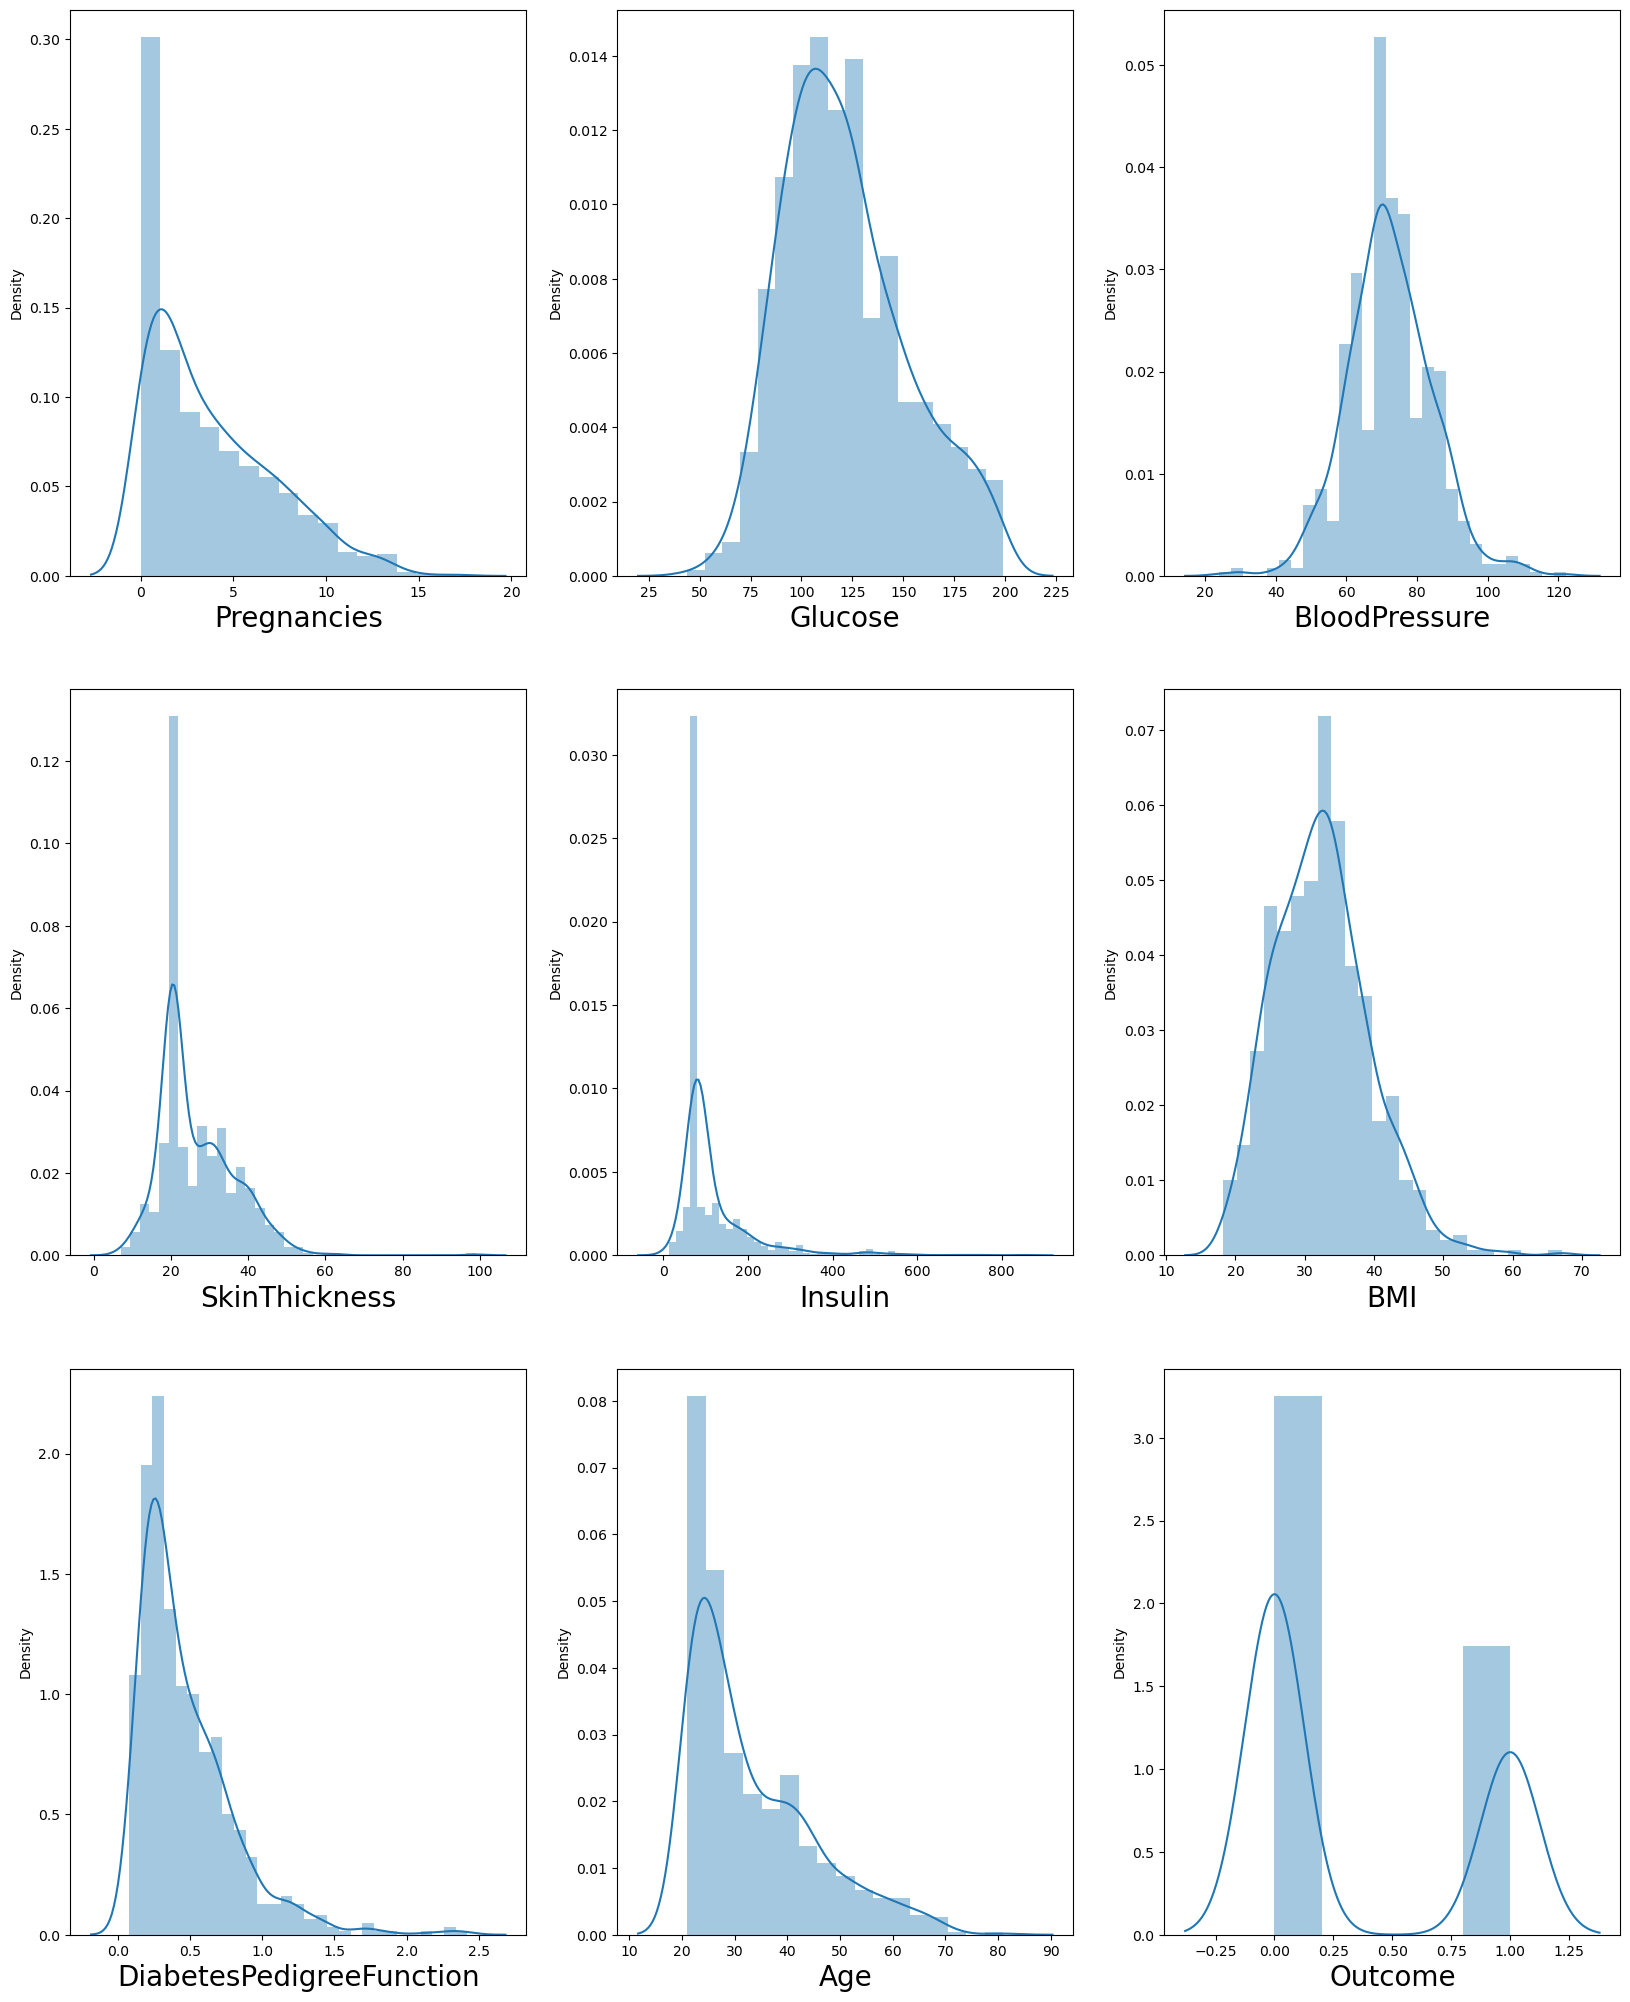

In [46]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

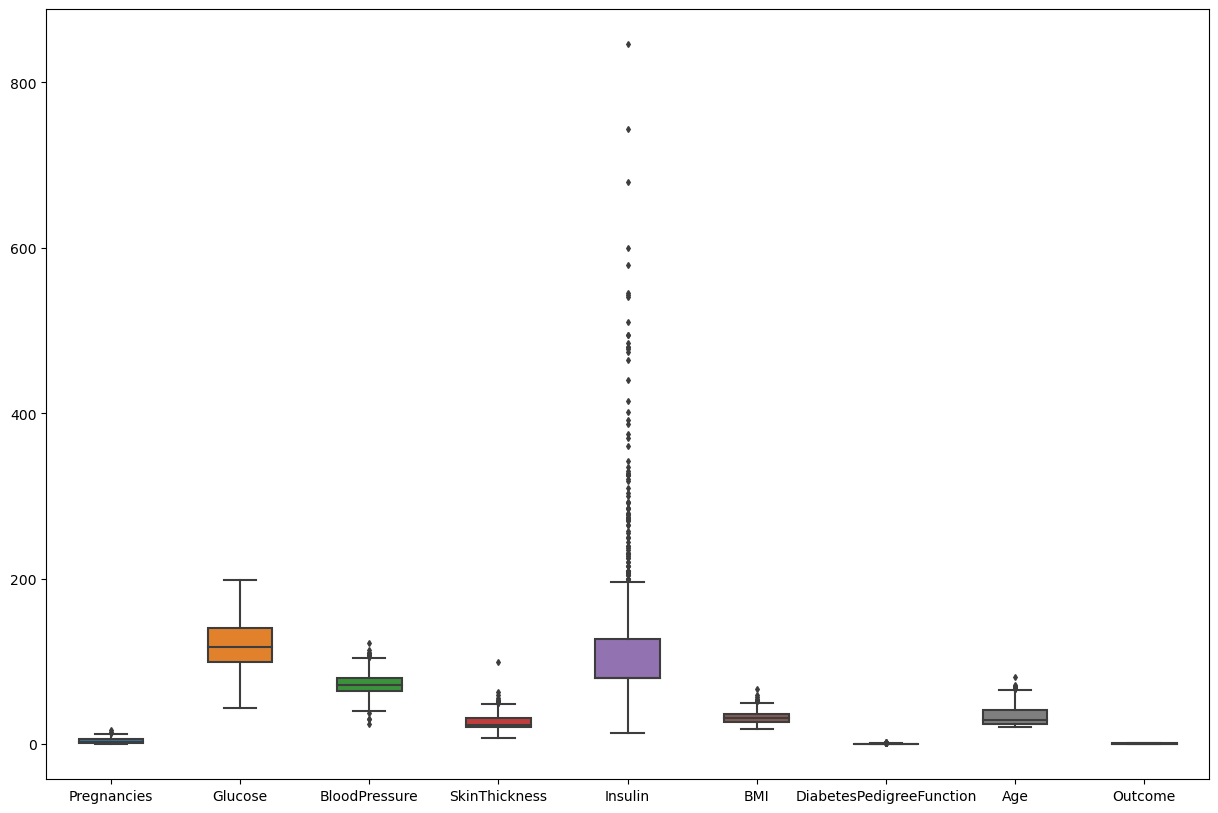

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [73]:
# we are removing the top 2% data from the Pregnancies column
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies']<q]

# we are removing the top 3% data from the BMI column
q = data_cleaned['BMI'].quantile(0.97)
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]

# we are removing the top 5% data from the SkinThickness column
q = data_cleaned['SkinThickness'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

# we are removing the top 10% data from the Insulin column
q = data_cleaned['Insulin'].quantile(0.90)
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

# we are removing the top 1% data from the Age column
q = data_cleaned['Age'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

<Axes: >

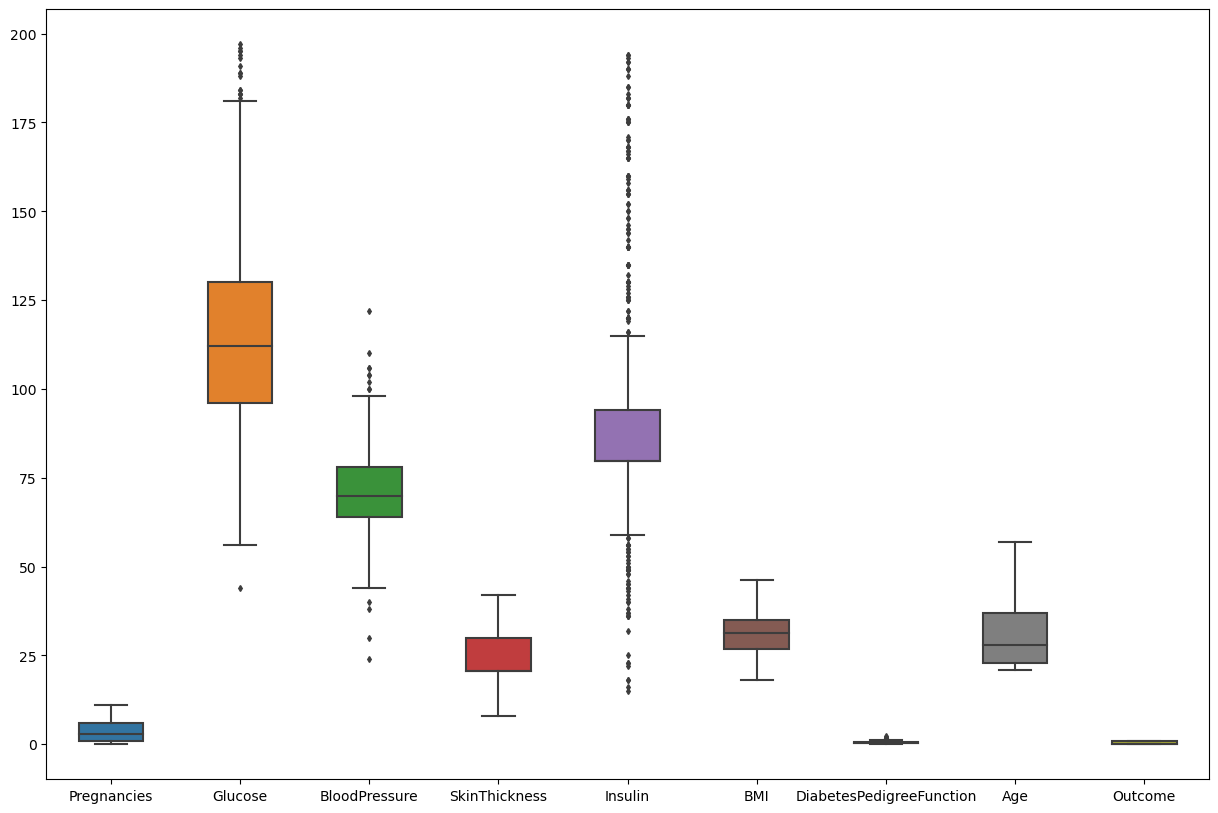

In [74]:
# Let's observe each column after dealing with an outlier
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

In [62]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

In [63]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [64]:
X_scaled

array([[ 0.80784977,  1.07739578,  0.0487607 , ...,  0.41195413,
         0.56038642,  1.61562366],
       [-0.87170043, -1.12796282, -0.45895199, ..., -0.76599206,
        -0.32089259, -0.11777133],
       [ 1.47966985,  2.30259501, -0.62818956, ..., -1.32130955,
         0.70407321, -0.02654002],
       ...,
       [ 0.47193973,  0.13224209,  0.0487607 , ..., -0.83330327,
        -0.65935482, -0.20900265],
       [-0.87170043,  0.30727055, -0.96666469, ..., -0.17701897,
        -0.32727867,  1.34192972],
       [-0.87170043, -0.84791729, -0.12047687, ..., -0.12653556,
        -0.43584203, -0.84762186]])

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state = 355)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [68]:
y_pred = log_reg.predict(x_test)

In [69]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7768595041322314

In [70]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6735880398671097

In [76]:
x_test.shape

(121, 8)

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[79, 20],
       [ 7, 15]], dtype=int64)

In [72]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.42857142857142855

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

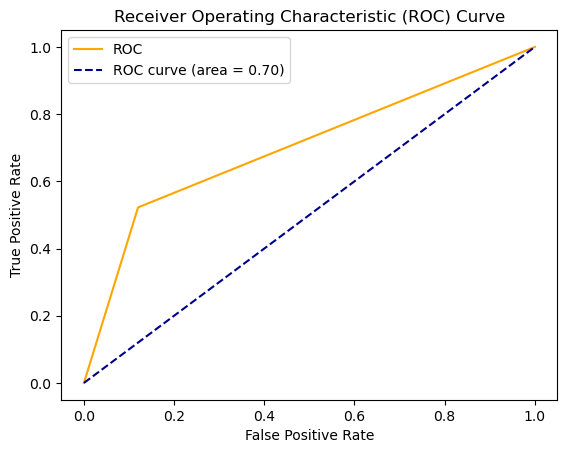

In [28]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Make a Prediction System

In [78]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [80]:
input_data = (5, 127, 72, 36, 78, 43, 0.527, 38)

input_data = np.asarray(input_data)

input_data_reshaped = input_data.reshape(1,-1)

std_data = scalar.transform(input_data_reshaped)
print(std_data)

[[ 0.47193973  0.34227625  0.0487607   1.59684354 -0.3925495   1.99376758
   0.24108243  0.52084787]]


In [81]:
prediction = log_reg.predict(std_data)
prediction

if prediction[0] == 0:
    print("the person is not diabetic")
else:
    print("the person is diabetic")

the person is diabetic
